In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


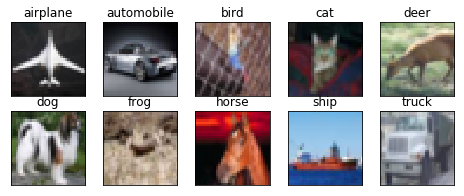

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [8]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0614 16:55:28.751048 140550246164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0614 16:55:28.794866 140550246164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 16:55:28.802135 140550246164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Epoch 1/100
  2/390 [..............................] - ETA: 25s - loss: 0.9059 - acc: 0.6836

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


390/390 [==============================] - 20s 52ms/step - loss: 0.9206 - acc: 0.6787 - val_loss: 0.7827 - val_acc: 0.7288
Epoch 2/100
390/390 [==============================] - 20s 52ms/step - loss: 0.8370 - acc: 0.7103 - val_loss: 0.7375 - val_acc: 0.7463
Epoch 3/100
390/390 [==============================] - 20s 52ms/step - loss: 0.7695 - acc: 0.7372 - val_loss: 0.7254 - val_acc: 0.7499
Epoch 4/100
390/390 [==============================] - 20s 52ms/step - loss: 0.7244 - acc: 0.7509 - val_loss: 0.6849 - val_acc: 0.7625
Epoch 5/100
390/390 [==============================] - 20s 52ms/step - loss: 0.6767 - acc: 0.7681 - val_loss: 0.6867 - val_acc: 0.7654
Epoch 6/100
390/390 [==============================] - 20s 52ms/step - loss: 0.6357 - acc: 0.7853 - val_loss: 0.6278 - val_acc: 0.7824
Epoch 7/100
390/390 [==============================] - 20s 51ms/step - loss: 0.6122 - acc: 0.7924 - val_loss: 0.6286 - val_acc: 0.7876
Epoch 8/100
390/390 [==============================] - 20s 52ms/ste

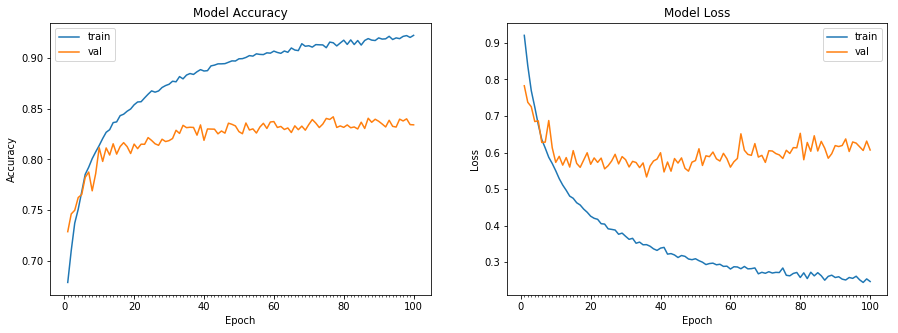

Accuracy on test data is: 83.42


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Assignment 6A


In [9]:
# Define the model
model = Sequential()
# input: 32 output: 32 | RF: 0
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# input: 32 output: 30 | RF: 3
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# input: 30 output: 28 | RF: 5
model.add(Convolution2D(32, 1, 1, activation='relu')) #22
# input: 28 output: 14 | RF: 10
model.add(MaxPooling2D(pool_size=(2, 2)))


# input: 14 output: 14 | RF: 10
model.add(Convolution2D(64, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# input: 14 output: 12 | RF: 12
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# input: 12 output: 10 | RF: 14
model.add(Convolution2D(32, 1, 1, activation='relu')) #22
# input: 10 output: 5 | RF: 28
model.add(MaxPooling2D(pool_size=(2, 2)))



# input: 5 output: 5 | RF: 28
model.add(Convolution2D(128, 3, 3,border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# input: 5 output: 3 | RF: 30
model.add(Convolution2D(256, 3, 3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#model.add(Convolution2D(10, 1, 1, activation='relu')) #22


# input: 768 1-D array output:512 
#model.add(Dense(512)) 
#model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#Convolution2D()
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

# input: 512 1-D array output:256 
#model.add(Dense(256))
model.add(Convolution2D(32, 4, 4))
model.add(Activation('relu'))
model.add(BatchNormalization())

# input: 3 output: 1 | RF: 32          
model.add(Convolution2D(10,1,1, activation='softmax'))

# input: 256 output:10 (num_classes)
#model.add(Dense(num_classes, activation='softmax'))
from keras.layers import GlobalAveragePooling2D
#GlobalAveragePooling2D()
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
          
#model.add(Convolution2D(10,1,1, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0614 16:55:33.885113 140550246164352 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), paddi

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="softmax")`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=100)`
W0614 05:47:11.183733 140049388324736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions f

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


195/195 [==============================] - 23s 120ms/step - loss: 2.0367 - acc: 0.4313 - val_loss: 1.9602 - val_acc: 0.5018
Epoch 2/100
195/195 [==============================] - 19s 98ms/step - loss: 1.8976 - acc: 0.5730 - val_loss: 1.8863 - val_acc: 0.5770
Epoch 3/100
195/195 [==============================] - 19s 98ms/step - loss: 1.8327 - acc: 0.6349 - val_loss: 1.8629 - val_acc: 0.5996
Epoch 4/100
195/195 [==============================] - 19s 99ms/step - loss: 1.7924 - acc: 0.6756 - val_loss: 1.8634 - val_acc: 0.5941
Epoch 5/100
195/195 [==============================] - 19s 99ms/step - loss: 1.7627 - acc: 0.7039 - val_loss: 1.7845 - val_acc: 0.6779
Epoch 6/100
195/195 [==============================] - 19s 98ms/step - loss: 1.7411 - acc: 0.7249 - val_loss: 1.7510 - val_acc: 0.7117
Epoch 7/100
195/195 [==============================] - 19s 99ms/step - loss: 1.7271 - acc: 0.7376 - val_loss: 1.7997 - val_acc: 0.6619
Epoch 8/100
195/195 [==============================] - 19s 100ms/s

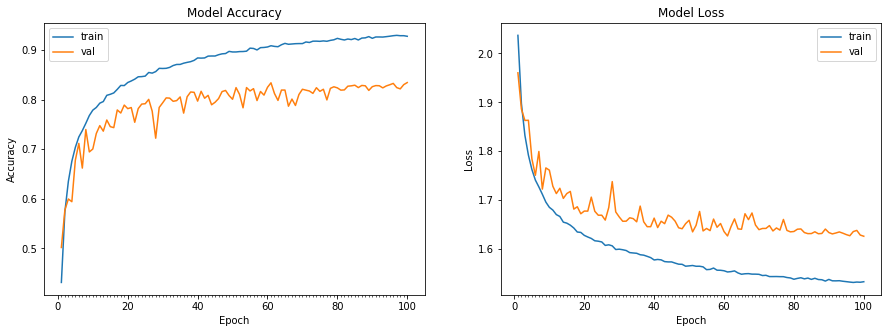

Accuracy on test data is: 83.44


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.1, 
                             horizontal_flip=False,
                             #width_shift_range=0.2,
                             #height_shift_range=0.2,
                             #rotation_range=10,
                             featurewise_center=True, 
                             featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### 6B :
Rewrite it again using these convolutions in the order given below: <br>
Normal Convolution <br>
Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1)) <br>
Depthwise Separable Convolution <br>
Grouped Convolution (use 3x3, 5x5 only) <br>
Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2)  <br>
You must use all of the 5 above at least once <br>
Train this new model for 50 epochs. <br>
Save File as Assignment 6B <br>

In [32]:
# Define import packages

from keras.layers import Input, Activation, SeparableConv2D
from keras.layers import Dropout, Convolution2D, Flatten, Concatenate, Lambda
from keras.models import Model

# Define Input shape 
input = Input(shape=(32,32,3))

# 1. Normal Convolution
x1 = Convolution2D(32, 3, 3, border_mode='same',activation='relu')(input)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.2) (x1)

# 2. Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
x2 = Convolution2D(64, 3, 1, border_mode='same', activation='relu') (x1)
x2 = Convolution2D(64, 1, 3, border_mode='same', activation='relu') (x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.2)(x2)

# 3. Depthwise Separable Convolution
x3 = SeparableConv2D(32, 3, 3, activation='relu',border_mode='same', depth_multiplier=3) (x2)
x3 = BatchNormalization()(x3)
x3 = Dropout(0.2)(x3)

x4 = MaxPooling2D(pool_size=(2, 2))(x3)


# 4. Grouped Convolution (use 3x3, 5x5 only)
x5 = Convolution2D(filters=64,
                 kernel_size=3,
                 activation='relu',
                 padding='same')(x4)

x6 = Convolution2D(filters=128,
                 kernel_size=5,
                 activation='relu',
                 padding='same')(x4)

x7 = Concatenate()([x5, x6])

x8 = MaxPooling2D(pool_size=(2, 2))(x7)


# 5. Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 
x9 = Convolution2D(filters=256,
                 kernel_size=3,
                 activation='relu',
                 padding='same', dilation_rate=1)(x8)

x10 = Convolution2D(filters=512,
                 kernel_size=3,
                 activation='relu',
                 padding='same', dilation_rate=2)(x8)

x11 = Concatenate()([x9,x10])
x11 = MaxPooling2D(pool_size=(2, 2))(x11)

# 2. Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
x12 = Convolution2D(64, 3, 1, border_mode='same', activation='relu') (x11)
x12 = Convolution2D(64, 1, 3, border_mode='same', activation='relu') (x12)
x12 = BatchNormalization()(x12)
x12 = Dropout(0.2)(x12)

# 3. Depthwise Separable Convolution
x13 = SeparableConv2D(32, 3, 3, activation='relu',depth_multiplier=3) (x12)
x13 = BatchNormalization()(x13)
x13 = Dropout(0.2)(x13)

# 1. Normal Convolution
x14 = Convolution2D(10, 2, 2,  activation='relu')(x13)

flatten = Flatten()(x14)
activation = Activation('softmax')(flatten)
model = Model(inputs=input, outputs=activation)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", depth_multiplier=3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 1), activation="relu", padding="same")`
/usr

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_131 (Conv2D)             (None, 32, 32, 32)   896         input_18[0][0]                   
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 32, 32, 32)   128         conv2d_131[0][0]                 
__________________________________________________________________________________________________
dropout_69 (Dropout)            (None, 32, 32, 32)   0           batch_normalization_69[0][0]     
__________________________________________________________________________________________________
conv2d_132

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", depth_multiplier=3)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2), activation="relu")`


" \nmodel.add(Convolution2D(32, 4, 4))\nmodel.add(Activation('relu'))\nmodel.add(BatchNormalization())\n\n# input: 3 output: 1 | RF: 32          \nmodel.add(Convolution2D(10,1,1, activation='softmax'))\n\n# input: 256 output:10 (num_classes)\n#model.add(Dense(num_classes, activation='softmax'))\nfrom keras.layers import GlobalAveragePooling2D\n#GlobalAveragePooling2D()\nmodel.add(GlobalAveragePooling2D())\nmodel.add(Activation('softmax'))\n          \n#model.add(Convolution2D(10,1,1, activation='softmax'))\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])\nmodel.summary()\n"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=100)`
W0614 17:11:36.933113 140550246164352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions f

Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


195/195 [==============================] - 41s 208ms/step - loss: 1.8752 - acc: 0.3210 - val_loss: 1.8333 - val_acc: 0.3751
Epoch 2/100
195/195 [==============================] - 32s 166ms/step - loss: 1.1989 - acc: 0.5712 - val_loss: 1.5447 - val_acc: 0.5112
Epoch 3/100
195/195 [==============================] - 32s 164ms/step - loss: 0.8811 - acc: 0.6905 - val_loss: 1.1791 - val_acc: 0.6317
Epoch 4/100
195/195 [==============================] - 32s 163ms/step - loss: 0.7027 - acc: 0.7554 - val_loss: 0.9288 - val_acc: 0.7092
Epoch 5/100
195/195 [==============================] - 32s 163ms/step - loss: 0.5819 - acc: 0.7988 - val_loss: 0.6650 - val_acc: 0.7832
Epoch 6/100
195/195 [==============================] - 32s 165ms/step - loss: 0.4885 - acc: 0.8309 - val_loss: 0.9275 - val_acc: 0.7190
Epoch 7/100
195/195 [==============================] - 33s 168ms/step - loss: 0.4051 - acc: 0.8607 - val_loss: 0.7494 - val_acc: 0.7763
Epoch 8/100
195/195 [==============================] - 33s 1

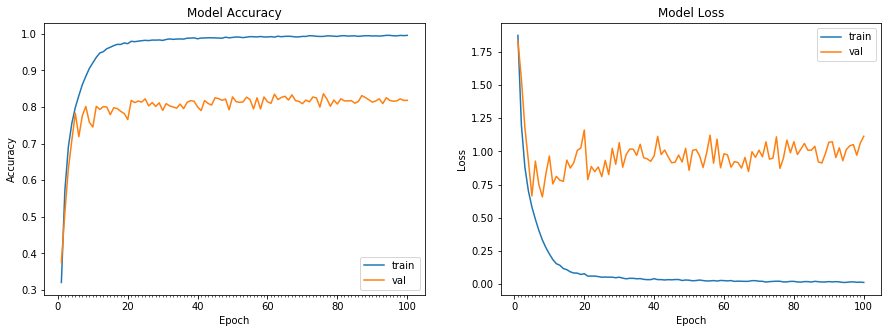

Accuracy on test data is: 81.82


In [33]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.1, 
                             horizontal_flip=False,
                             featurewise_center=True, 
                             featurewise_std_normalization=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))